In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

# Exemplo Classificação

In [2]:
df = (
    pd.read_csv('../data/titanic.csv',usecols=['Survived','Age','Fare'])
    .assign(Age = lambda x: x.Age.fillna(x.Age.mean()))   
)
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


[Text(0.5, 1.0, 'Boxplot Fare')]

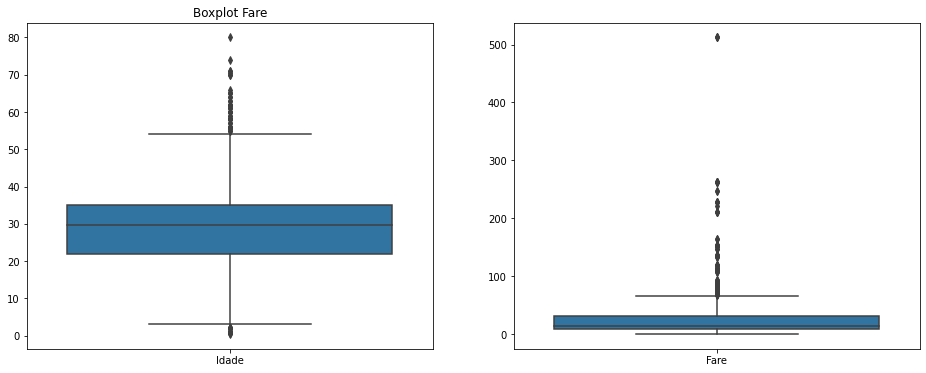

In [3]:
f, ax = plt.subplots(1,2,figsize=(16,6))

plot_age = sns.boxplot(data=df.Age,ax=ax[0])
plot_fare = sns.boxplot(data=df.Fare,ax=ax[1])

plot_age.set_xticklabels(['Idade'])
plot_age.set(title='Boxplot Idade')

plot_fare.set_xticklabels(['Fare'])
plot_age.set(title='Boxplot Fare')

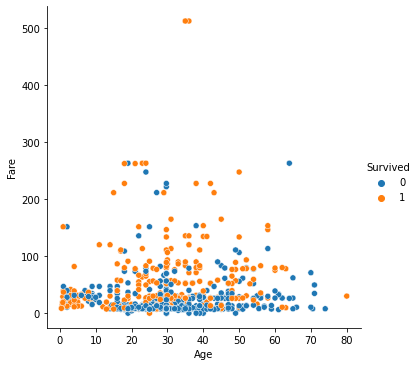

In [4]:
sns.relplot(x='Age',y='Fare',hue='Survived',data=df)

In [5]:
def find_outlier(coluna,peso=1.5):
    
    iqr = np.percentile(coluna,75) - np.percentile(coluna,25)
    limite_inferior = np.percentile(coluna,25) - (peso*iqr)
    limite_superior = np.percentile(coluna,75) + (peso*iqr)
    
    return (coluna > limite_superior) | (coluna < limite_inferior)

In [6]:
df_no_out = (
    df
    .assign(out_idade = lambda x: x.Age.pipe(find_outlier))
    .assign(out_fare  = lambda x: x.Fare.pipe(find_outlier))
    .query("out_idade == False and out_fare == False")
    .drop(['out_idade','out_fare'],axis=1)
)

In [7]:
x = df_no_out.drop(['Survived'],axis=1)
y = df_no_out.Survived

In [13]:
dt = DecisionTreeClassifier(max_depth=3,criterion='entropy')
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

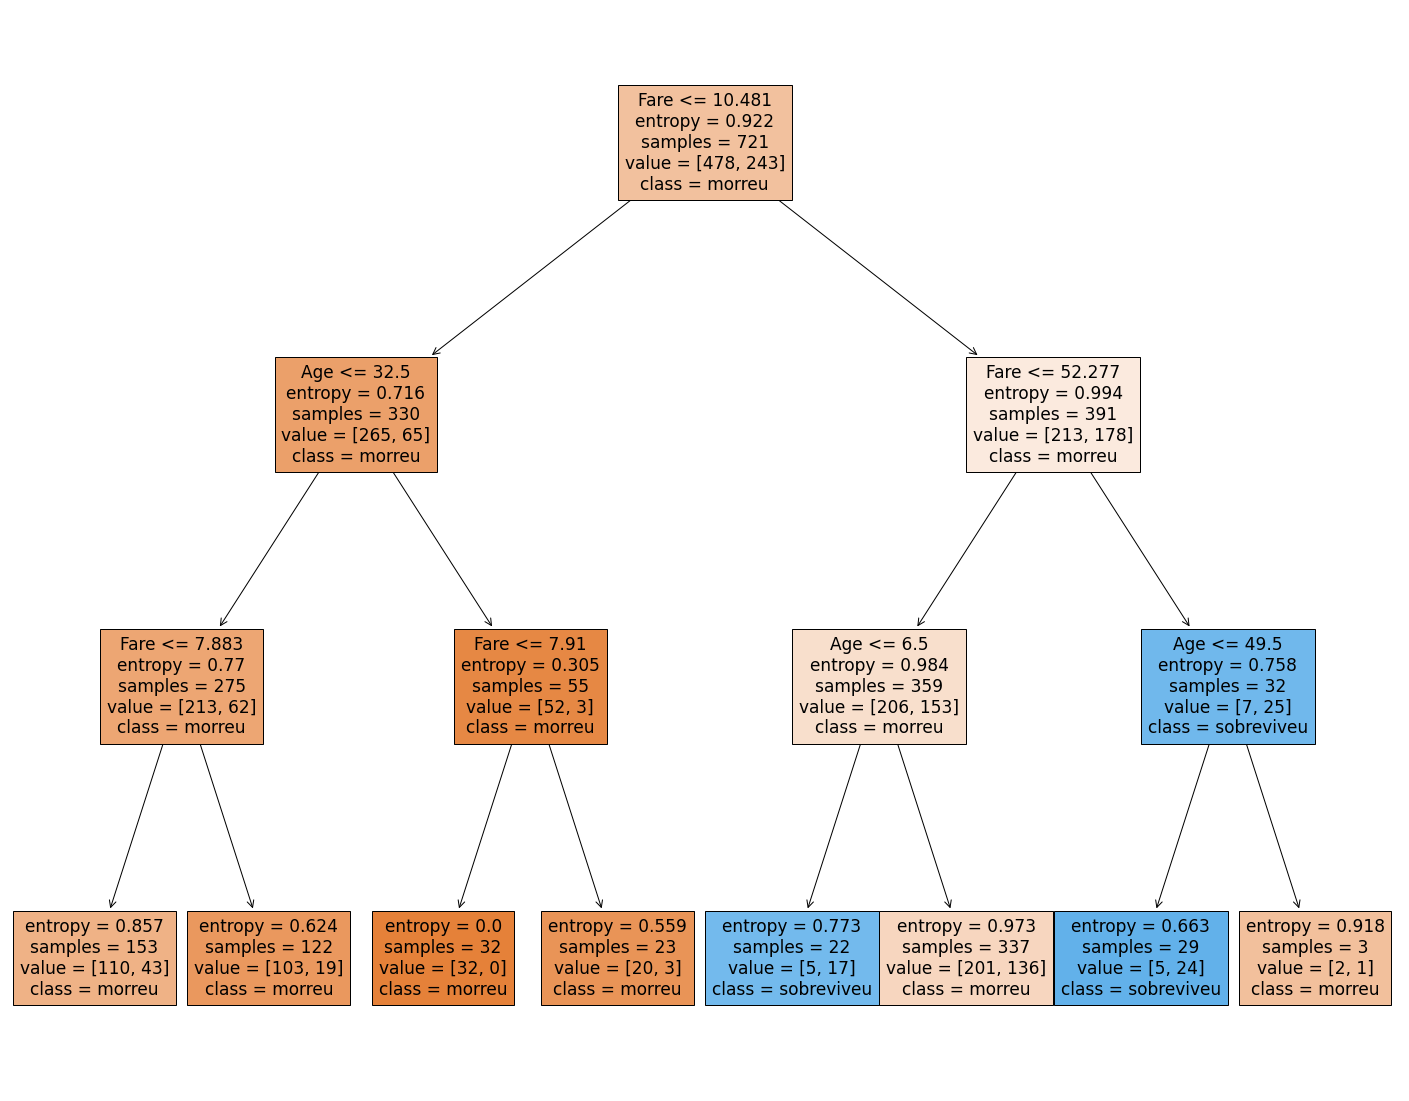

In [14]:
f, ax = plt.subplots(1,1,figsize=(25,20))
_ = tree.plot_tree(dt,ax=ax,feature_names=x.columns,filled=True,class_names=['morreu','sobreviveu'])

In [15]:
dt.score(x,y)

0.7059639389736477

In [21]:
dt.predict_proba([[58,50.52]])

array([[0.59643917, 0.40356083]])

In [25]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64